# Analyze A/B Test Results 

This project will assure you have mastered the subjects covered in the statistics lessons. We have organized the current notebook into the following sections: 

- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Final Check](#finalcheck)
- [Submission](#submission)

Specific programming tasks are marked with a **ToDo** tag. 

<a id='intro'></a>
## Introduction

A/B tests are very commonly performed by data analysts and data scientists. For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should:
- Implement the new webpage, 
- Keep the old webpage, or 
- Perhaps run the experiment longer to make their decision.

Each **ToDo** task below has an associated quiz present in the classroom.  Though the classroom quizzes are **not necessary** to complete the project, they help ensure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the [rubric](https://review.udacity.com/#!/rubrics/1214/view) specification. 

<a id='probability'></a>
## Part I - Probability

To get started, let's import our libraries.

In [120]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

### ToDo 1.1
Now, read in the `ab_data.csv` data. Store it in `df`. Below is the description of the data, there are a total of 5 columns:

<center>

|Data columns|Purpose|Valid values|
| ------------- |:-------------| -----:|
|user_id|Unique ID|Int64 values|
|timestamp|Time stamp when the user visited the webpage|-|
|group|In the current A/B experiment, the users are categorized into two broad groups. <br>The `control` group users are expected to be served with `old_page`; and `treatment` group users are matched with the `new_page`. <br>However, **some inaccurate rows** are present in the initial data, such as a `control` group user is matched with a `new_page`. |`['control', 'treatment']`|
|landing_page|It denotes whether the user visited the old or new webpage.|`['old_page', 'new_page']`|
|converted|It denotes whether the user decided to pay for the company's product. Here, `1` means yes, the user bought the product.|`[0, 1]`|
</center>
Use your dataframe to answer the questions in Quiz 1 of the classroom.




**a.** Read in the dataset from the `ab_data.csv` file and take a look at the top few rows here:

In [121]:
#load data as a pandas dataframe
df= pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [123]:
#calculate duplicate rows in dataset
print("number of duplicated rows is :\n " ,df.duplicated().sum())

number of duplicated rows is :
  0


***According to the result above there is no duplicate rows in our dataset***

**b.** Use the cell below to find the number of rows in the dataset.

In [124]:
#printout how many rows and columns in the data
print( 'Number of rows in our dataset is: \n',df.shape[0])

Number of rows in our dataset is: 
 294478


**c.** The number of unique users in the dataset.

In [125]:
print('Number Of Unique Users In Dataset Is: \n',df.user_id.nunique())

Number Of Unique Users In Dataset Is: 
 290584


**d.** The proportion of users converted.

In [126]:
proportion_of_users_converted=df['converted'].mean()
print('The proportion of users converted Is : \n',"{:.3%}".format(proportion_of_users_converted))

The proportion of users converted Is : 
 11.966%


**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [127]:
df.query('group=="treatment" and landing_page=="old_page"').shape[0]

1965

The number of times the old_page and control don't line up.

In [128]:
df.query('group=="control" and landing_page=="new_page"').shape[0]

1928

**f.** Do any of the rows have missing values?

In [129]:
#calculate number of columns with missing data 
number_of_columns_with_missing_data=df.isnull().any().sum()
print("Number of columns with missing data is:\n",number_of_columns_with_missing_data)

Number of columns with missing data is:
 0


***According to the result above there is no  rows with missing values in our dataset***

### ToDo 1.2  
In a particular row, the **group** and **landing_page** columns should have either of the following acceptable values:

|user_id| timestamp|group|landing_page|converted|
|---|---|---|---|---|
|XXXX|XXXX|`control`| `old_page`|X |
|XXXX|XXXX|`treatment`|`new_page`|X |


It means, the `control` group users should match with `old_page`; and `treatment` group users should matched with the `new_page`. 

However, for the rows where `treatment` does not match with `new_page` or `control` does not match with `old_page`, we cannot be sure if such rows truly received the new or old wepage.  


Use **Quiz 2** in the classroom to figure out how should we handle the rows where the group and landing_page columns don't match?

**a.** Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [130]:
# Remove the inaccurate rows, and store the result in a new dataframe df2
df2=pd.DataFrame(df.query('group=="control" and landing_page=="old_page" or group=="treatment" and landing_page=="new_page"' ))
print(df2.shape)
df2.head()

(290585, 5)


,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [131]:
# Double Check all of the incorrect rows were removed from df2 - 
# Output of the statement below should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

***According to the result above there is no  rows with unmatched values in our dataset***

### ToDo 1.3  
Use **df2** and the cells below to answer questions for **Quiz 3** in the classroom.

**a.** How many unique **user_id**s are in **df2**?

In [132]:
print('Number Of Unique Users In Dataset Is: \n',df2.user_id.nunique())

Number Of Unique Users In Dataset Is: 
 290584


**b.** There is one **user_id** repeated in **df2**.  What is it?

In [133]:
duplicated_userid=df2[df2.duplicated(['user_id'])]
print(duplicated_userid)
print('Repeated user id in df2 is: \n',df2._get_value(2893,'user_id'))

      user_id                   timestamp      group landing_page  converted
2893   773192  2017-01-14 02:55:59.590927  treatment     new_page          0
Repeated user id in df2 is: 
 773192


**c.** Display the rows for the duplicate **user_id**? 

In [134]:
df2[df2.duplicated(['user_id'])]


,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [135]:
# Remove one of the rows with a duplicate user_id..
# Hint: The dataframe.drop_duplicates() may not work in this case because the rows with duplicate user_id are not entirely identical. 
df2.drop(2893,axis=0,inplace=True)
# Check again if the row with a duplicate user_id is deleted or not
print(df2.shape)
df2[df2.duplicated(['user_id'])]

(290584, 5)


,user_id,timestamp,group,landing_page,converted


### ToDo 1.4  
Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

**a.** What is the probability of an individual converting regardless of the page they receive?<br><br>




In [136]:
p_population=df2['converted'].mean()
p_population

0.11959708724499628

**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [137]:
df2[df2['group']=="control"]['converted'].mean()

0.1203863045004612

**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [138]:
df2[df2['group']=="treatment"]['converted'].mean()

0.11880806551510564

In [139]:
# Calculate the actual difference (obs_diff) between the conversion rates for the two groups.
obs_diff=df2[df2['group']=="treatment"]['converted'].mean()-df2[df2['group']=="control"]['converted'].mean()
obs_diff

-0.0015782389853555567

**d.** What is the probability that an individual received the new page?

In [140]:
df2.query('landing_page=="new_page"').shape[0]/df2.shape[0]

0.5000619442226688

**e.** Consider your results from parts (a) through (d) above, and explain below whether the new `treatment` group users lead to more conversions.

>**there is  no sufficient evidence to say that the new treatment page leads to more conversions   
as the probabity of the conversion in control page is slightly higher than conversion in  treatment page   
and for practical there is no signficance between the two pages as the differenc in probablity is so small.**

<a id='ab_test'></a>
## Part II - A/B Test

Since a timestamp is associated with each event, you could run a hypothesis test continuously as long as you observe the events. 

However, then the hard questions would be: 
- Do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  
- How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


### ToDo 2.1
For now, consider you need to make the decision just based on all the data provided.  

> Recall that you just calculated that the "converted" probability (or rate) for the old page is *slightly* higher than that of the new page (ToDo 1.4.c). 

If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should be your null and alternative hypotheses (**$H_0$** and **$H_1$**)?  

You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the "converted" probability (or rate) for the old and new pages respectively.

$$H_0: p_{new}-p_{old} \leq 0$$


$$H_1: p_{new}-p_{old}  >0$$


### ToDo 2.2 - Null Hypothesis $H_0$ Testing
Under the null hypothesis $H_0$, assume that $p_{new}$ and $p_{old}$ are equal. Furthermore, assume that $p_{new}$ and $p_{old}$ both are equal to the **converted** success rate in the `df2` data regardless of the page. So, our assumption is: <br><br>
<center>
$p_{new}$ = $p_{old}$ = $p_{population}$
</center>

In this section, you will: 

- Simulate (bootstrap) sample data set for both groups, and compute the  "converted" probability $p$ for those samples. 


- Use a sample size for each group equal to the ones in the `df2` data.


- Compute the difference in the "converted" probability for the two samples above. 


- Perform the sampling distribution for the "difference in the converted probability" between the two simulated-samples over 10,000 iterations; and calculate an estimate. 



Use the cells below to provide the necessary parts of this simulation.  You can use **Quiz 5** in the classroom to make sure you are on the right track.

**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

In [141]:
p_new=round(df2['converted'].mean(),4)
p_new

0.1196

**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [142]:
p_old=round(df2['converted'].mean(),4)
p_old

0.1196

**c.** What is $n_{new}$, the number of individuals in the treatment group? <br><br>


In [143]:
#number of users landing on new page
n_new=df2.query('group=="treatment" and landing_page=="new_page"').shape[0]
n_new

145310

**d.** What is $n_{old}$, the number of individuals in the control group?

In [144]:
#number of users landing on old page
n_old=df2.query('group=="control" and landing_page=="old_page"').shape[0]
n_old

145274

**e. Simulate Sample for the `treatment` Group**<br> 
Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null hypothesis.  <br><br>


In [145]:
# Simulate a Sample for the treatment Group
new_page_converted=np.random.choice([1,0],p=[p_new,1-p_new],size=n_new)
new_page_converted

array([0, 0, 0, ..., 0, 0, 0])

**f. Simulate Sample for the `control` Group** <br>
Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null hypothesis. <br> Store these $n_{old}$ 1's and 0's in the `old_page_converted` numpy array.

In [146]:
# Simulate a Sample for the control Group
old_page_converted=np.random.choice([1,0],p=[p_old,1-p_old],size=n_old)
old_page_converted

array([0, 0, 0, ..., 0, 0, 1])

**g.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples from the parts (e) and (f) above. 

In [147]:
diff=new_page_converted.mean()-old_page_converted.mean()
diff

0.0020628762150489421


**h. Sampling distribution** <br>
Re-create `new_page_converted` and `old_page_converted` and find the $(p{'}_{new}$ - $p{'}_{old})$ value 10,000 times using the same simulation process you used in parts (a) through (g) above. 

<br>
Store all  $(p{'}_{new}$ - $p{'}_{old})$  values in a NumPy array called `p_diffs`.

In [148]:
# Sampling distribution 
p_diffs = []
new_page_converted= np.random.binomial(n_new, p_new, 10000) 
old_page_converted = np.random.binomial(n_old, p_old, 10000)
p_diffs = new_page_converted/n_new - old_page_converted/n_old
p_diffs = np.array(p_diffs)

**i. Histogram**<br> 
Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.<br><br>

Also, use `plt.axvline()` method to mark the actual difference observed  in the `df2` data (recall `obs_diff`), in the chart.  



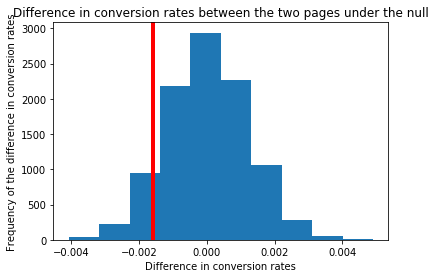

In [149]:
plt.hist(p_diffs);
plt.axvline(obs_diff, c='red',linewidth=4);
plt.xlabel('Difference in conversion rates');
plt.ylabel('Frequency of the difference in conversion rates');
plt.title('Difference in conversion rates between the two pages under the null')
plt.show();

***the plot like we expects a histogram with normal distribution according to the central limit theorem which states with large random samples from the population with replacement the distribution of the sample propotions will be approximately normally distributed***

**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

In [150]:
# compute p value
print('The p-value is: \n',(p_diffs> obs_diff).mean())

The p-value is: 
 0.9096


**k.** Please explain in words what you have just computed in part **j** above.  
 - What is this value called in scientific studies?  
 - What does this value signify in terms of whether or not there is a difference between the new and old pages? *Hint*: Compare the value above with the "Type I error rate (0.05)". 

***1-this value is called p-value and it means if the null hypothesis is true the probablity of the obtaining the observed static or one more extreme in favor of the alternative***

a-when this value is greater than type I error rate which is 5% in our case then we fail to reject the null hypothesis   
b-when this value is smaller than or equal type I error rate then we have evidence to reject the null hypothesis 

***2-in our case the p_value which equal to (0.9044)is greater than type I error rate which equal to (0.05)***   
***so we fail to reject the null hypothesis***   
the old page and the new page have equal conversion rate   
***according to that we shold not launch the new page***




**l. Using Built-in Methods for Hypothesis Testing**<br>
We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. 

Fill in the statements below to calculate the:
- `convert_old`: number of conversions with the old_page
- `convert_new`: number of conversions with the new_page
- `n_old`: number of individuals who were shown the old_page
- `n_new`: number of individuals who were shown the new_page


In [151]:
import statsmodels.api as sm

# number of conversions with the old_page
convert_old = df2.query('landing_page=="old_page" and converted==1').shape[0]
print(convert_old)
# number of conversions with the new_page
convert_new =df2.query(' landing_page=="new_page"and converted==1').shape[0]
print(convert_new)
#number of individuals who were shown the old_page
n_old = df2.query('landing_page=="old_page"').shape[0]
print(n_old )
# number of individuals who received new_page
n_new = df2.query('landing_page=="new_page"').shape[0]
print(n_new )

17489
17264
145274
145310


**m.** Now use `sm.stats.proportions_ztest()` to compute your test statistic and p-value.  [Here](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html) is a helpful link on using the built in.

The syntax is: 
```bash
proportions_ztest(count_array, nobs_array, alternative='larger')
```
where, 
- `count_array` = represents the number of "converted" for each group
- `nobs_array` = represents the total number of observations (rows) in each group
- `alternative` = choose one of the values from `[‘two-sided’, ‘smaller’, ‘larger’]` depending upon two-tailed, left-tailed, or right-tailed respectively. 
>**Hint**: <br>
It's a two-tailed if you defined $H_1$ as $(p_{new} = p_{old})$. <br>
It's a left-tailed if you defined $H_1$ as $(p_{new} < p_{old})$. <br>
It's a right-tailed if you defined $H_1$ as $(p_{new} > p_{old})$. 

The built-in function above will return the z_score, p_value. 

---
### About the two-sample z-test
Recall that you have plotted a distribution `p_diffs` representing the
difference in the "converted" probability  $(p{'}_{new}-p{'}_{old})$  for your two simulated samples 10,000 times. 

Another way for comparing the mean of two independent and normal distribution is a **two-sample z-test**. You can perform the Z-test to calculate the Z_score, as shown in the equation below:

$$
Z_{score} = \frac{ (p{'}_{new}-p{'}_{old}) - (p_{new}  -  p_{old})}{ \sqrt{ \frac{\sigma^{2}_{new} }{n_{new}} + \frac{\sigma^{2}_{old} }{n_{old}}  } }
$$

where,
- $p{'}$ is the "converted" success rate in the sample
- $p_{new}$ and $p_{old}$ are the "converted" success rate for the two groups in the population. 
- $\sigma_{new}$ and $\sigma_{new}$ are the standard deviation for the two groups in the population. 
- $n_{new}$ and $n_{old}$ represent the size of the two groups or samples (it's same in our case)


>Z-test is performed when the sample size is large, and the population variance is known. The z-score represents the distance between the two "converted" success rates in terms of the standard error. 

Next step is to make a decision to reject or fail to reject the null hypothesis based on comparing these two values: 
- $Z_{score}$
- $Z_{\alpha}$ or $Z_{0.05}$, also known as critical value at 95% confidence interval.  $Z_{0.05}$ is 1.645 for one-tailed tests,  and 1.960 for two-tailed test. You can determine the $Z_{\alpha}$ from the z-table manually. 

Decide if your hypothesis is either a two-tailed, left-tailed, or right-tailed test. Accordingly, reject OR fail to reject the  null based on the comparison between $Z_{score}$ and $Z_{\alpha}$. We determine whether or not the $Z_{score}$ lies in the "rejection region" in the distribution. In other words, a "rejection region" is an interval where the null hypothesis is rejected iff the $Z_{score}$ lies in that region.

>Hint:<br>
For a right-tailed test, reject null if $Z_{score}$ > $Z_{\alpha}$. <br>
For a left-tailed test, reject null if $Z_{score}$ < $Z_{\alpha}$. 




Reference: 
- Example 9.1.2 on this [page](https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Book%3A_Introductory_Statistics_(Shafer_and_Zhang)/09%3A_Two-Sample_Problems/9.01%3A_Comparison_of_Two_Population_Means-_Large_Independent_Samples), courtesy www.stats.libretexts.org

---



In [152]:
import statsmodels.api as sm
# ToDo: Complete the sm.stats.proportions_ztest() method arguments
count=[convert_new,convert_old]
nobsv=[n_new,n_old]
z_score, p_value = sm.stats.proportions_ztest(count,nobsv,alternative ='larger')
print('stat = {:.2f}, pval = {:.4f}'.format(z_score, p_value))

stat = -1.31, pval = 0.9051


**n.** What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?<br><br>

>**Tip**: Notice whether the p-value is similar to the one computed earlier. Accordingly, can you reject/fail to reject the null hypothesis? It is important to correctly interpret the test statistic and p-value.

**1-z-score is (-1.31) , p-value  is (0.9051)    
2-Yes they agree with findings in parts j and k**    
a- for z-score in our case which is right-tailed test so for type I error rate is(0.05)   
 the critical value is (1.645)so with z-score is (-1.31) is less than crtical value (1.645)   
***we fail to reject the null hypothesis and the old page and the new page have the same effect on the conversion rate***    
b-with type I error rate equal to (0.05) so our case the p_value which equal to (0.9051)is greater than type I error rate    
***so we fail to reject the null hypothesis and the old page and the new page have the same effect on the conversion rate*** 


<a id='regression'></a>
### Part III - A regression approach

### ToDo 3.1 
In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

**a.** Since each row in the `df2` data is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic Regression.**

**b.** The goal is to use **statsmodels** library to fit the regression model you specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives. However, you first need to create the following two columns in the `df2` dataframe:
 1. `intercept` - It should be `1` in the entire column. 
 2. `ab_page` - It's a dummy variable column, having a value `1` when an individual receives the **treatment**, otherwise `0`.  

In [153]:
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']
df2['intercept'] = 1
df2.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1


**c.** Use **statsmodels** to instantiate your regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 


In [154]:
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


**d.** Provide the summary of your model below, and use it as necessary to answer the following questions.

In [155]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-10-10 18:21 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

**e.** What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  




***1-p-value associated with ab_page is (0.190)***

**2-hypotheses associated with my regression model are:   
a-the null hypothesis is the new page that customer recieves has no effect on convesion rate   
b-the alternative hypothesis is the new page that customer recieves has an effect on convesion rate 
they are(two-tailed test)

$$H_0: \beta_1= 0$$


$$H_1: \beta_1\neq 0$$
so with type I error rate equal to (0.05) so our case the p_value which equal to (0.190)is greater than type I error rate   
***so we fail to reject the null hypothesis so the new page that customer recieves has no effect on convesion rate*** 
the null hypothesis in the Part II consider that there is no differencee between the two pages for conversion rate(one-tailed test)upper case so    it agree with the null hypothesis in my regression model which consider that: $$\beta_1=0$$ so ***the ab_page has no effect to predict the conversion rate***   
the alternative hypothesis in the Part II consider that the conversion rate of the new page is higher than the old one so it agree with the alternative hypothesis in my regression model which consider that: $$\beta_1\neq0$$ so ***the ab_page is significant to predict the conversion rate***

***finally my hypotheses in the Part II and my regression model agree with each other and the final result that we fail to reject the null hypothesis so the new page that customer recieves has no effect on convesion rate*** 

**f.** Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**1-It is a good idea to consider other factors to add into our regression model such as country,gender and hour   
because one variable or interaction between them can be helpful in predicting our response   
2-there are disadvantages to adding additional terms into our regression model
such as :   
a- if two independent variables are correlated to each other this will cause multicollinearity and this lead to misleading results for our regression model.** 


**g. Adding countries**<br> 
Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. 

1. You will need to read in the **countries.csv** dataset and merge together your `df2` datasets on the appropriate rows. You call the resulting dataframe `df_merged`. [Here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html) are the docs for joining tables. 

2. Does it appear that country had an impact on conversion?  To answer this question, consider the three unique values, `['UK', 'US', 'CA']`, in the `country` column. Create dummy variables for these country columns. 


 Provide the statistical output as well as a written response to answer this question.

In [156]:
# Read the countries.csv
countries_df = pd.read_csv('countries.csv')
countries_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [157]:
# Join with the df2 dataframe
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [158]:
# Create the necessary dummy variables
df_new[['US','UK','CA']] = pd.get_dummies(df_new['country'])
df_new.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept,US,UK,CA
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


In [159]:
logit_mod2 = sm.Logit(df_new['converted'], df_new[['intercept','ab_page','US','UK']])
results2= logit_mod2.fit()
results2.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-10-10 18:21 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9893    0.0089  -223.7628  0.0000  -2.0067  -1.9718
ab_page      -0.0149    0.0114    -1.3069  0.1912  -0.0374   0.0075
US           -0.0408    0.0269    -1.5161  0.1295  -0.0934   0.0119
UK            0.0099    0.0133     0.7433  0.4573  -0.0162   0.0359
==================================================================

"""

so with type I error rate equal to (0.05) so our case the p_values for(US,UK) which equal to (0.1295,0.4573)are greater than type I error rate   
***so we fail to reject the null hypothesis so the country that customer from has no effect on convesion rate*** 
 the null hypothesis in my regression model which consider that: $$\beta_1=0$$ so ***the country  has no effect on convesion rate***

**h. Fit your model and obtain the results**<br> 
Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if are there significant effects on conversion.  **Create the necessary additional columns, and fit the new model.** 


Provide the summary results (statistical output), and your conclusions (written response) based on the results. 



In [160]:
# Fit your model, and summarize the results
#make interaction between page and country 
df_new['page_inter_us']=(df_new['ab_page']*df_new['US'])
df_new['page_inter_uk']=(df_new['ab_page']*df_new['UK'])

In [161]:
logit_mod3= sm.Logit(df_new['converted'],df_new[['intercept','ab_page','US','UK','page_inter_us','page_inter_uk']])
results3= logit_mod3.fit()
results3.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-10-10 18:21 AIC:              212782.6602
No. Observations:   290584           BIC:              212846.1381
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
------------------------------------------------------------------
                  Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
intercept        -1.9865   0.0096 -206.3440 0.0000 -2.0053 -1.9676
ab_page          -0.0206   0.0137   -1.5052 0.1323 -0.0473  0.0062
US               -0.0175   0.0377   -0.4652 0.6418 -0.0914  0.0563
UK               -0.0057   0.0188   -0.3057 0.7598 -0.0426  0.0311
page_inter_us    -0.0469   0.0538   -0.8718 0.3833 -0.1523  0.0585
page_inter_uk     0.0314   0.0266    1.1807 0.2377 -0.0207  0.0835
==================================================================

"""

so with type I error rate equal to (0.05) so our case the p_values for interaction between ab_page and country (US,UK) which equal to (0.383,0.238)are greater than type I error rate   
***so we fail to reject the null hypothesis so the interaction between ab_page and country has no effect on convesion rate*** 
 the null hypothesis in my regression model which consider that: $$\beta_1=0$$ so ***interaction between ab_page and country has no effect on convesion rate*** 

In [162]:
#change datatype of timestamp to datetime for bettter analysis
df_new['timestamp']=pd.to_datetime(df_new['timestamp'])

In [163]:
#calculate duration of our experiment
exp_duration=df_new['timestamp'].max()-df_new['timestamp'].min()
print(exp_duration)

21 days 23:59:49.081927


***the duration of experiment is close to (22) days***

<a id='conclusions'></a>
## Conclusions

***for statistical significance:      
Based on A/B test and logistic regression the new page has no effect on conversion rate  and  from logistic regression the country has no effect on conversion rate too so the website should keep the old page or run the experiment for more time   
for practical significance:   
the experiment should run for a longer time than 22 days so we can judge the new page*** 


<a id='finalcheck'></a>
## Final Check!

Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!


<a id='submission'></a>
## Submission
You may either submit your notebook through the "SUBMIT PROJECT" button at the bottom of this workspace, or you may work from your local machine and submit on  the last page of this project lesson.  

1. Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).


2. Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.


3. Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [164]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0